In [1]:
# Dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import random
from citipy import citipy
from datetime import datetime 
from config import weather_api_key
import requests
import time
from scipy.stats import linregress

In [2]:
# Create list for weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------
Beginning Data Retrieval     
-----------------------------


In [3]:
# Create basic url for API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create 1500 random latitude and longitude coordinates 
latitudes = np.random.uniform(-90, 90, size = 1500)
longitudes = np.random.uniform(-180, 180, size = 1500)
coordinates = zip(latitudes, longitudes)
coordinates

In [5]:
# Add coordinates to a list 
coordinates_lst = list(coordinates)

In [6]:
# Create list for cities 
cities = []

# Use citipy to find nearest cities using coordinate list
for coordinate in coordinates_lst:
    city = citipy.nearest_city(coordinate[0],coordinate[1])
    city_name = city.city_name
    country_name = city.country_code
    
    # Find unique cities to add to cities list
    if city_name not in cities:
        cities.append(city_name)
    
    # See cities and contries
    # print(f'{city_name}, {country_name}')

# Count amount of unique cities
len(cities)

617

617

In [7]:
# Loop through city Lists 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 
    if (i % 50 == 0 and i >= 50):
        set_count += 1 
        record_count = 1 
    
    # Create URL for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log URL, set, and record numbers for each city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

# Make an API request for each city 
    try:
       
        # Parse the JSON data
        city_weather = requests.get(city_url).json()

        # Compile needed data
        city_city = city.title()
        city_country = city_weather['sys']['country']
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_hum = city_weather['main']['humidity']
        city_cloud = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']

        # Fill City Data list 
        city_data.append({"City": city_city,
                         "Country": city_country,
                         "Date": city_date,
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_hum,
                         "Cloudiness": city_cloud,
                         "Wind Speed": city_wind,
                         })
    #If an error occurs
    except: 
        print("City not found. Skipping")
        pass

    # Complete Data Retrieval    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vastervik
City not found. Skipping
Processing Record 2 of Set 1 | anori
Processing Record 1 of Set 1 | vastervik
City not found. Skipping
Processing Record 2 of Set 1 | anori
Processing Record 3 of Set 1 | marysville
Processing Record 3 of Set 1 | marysville
Processing Record 4 of Set 1 | bria
Processing Record 4 of Set 1 | bria
Processing Record 5 of Set 1 | shimoda
Processing Record 5 of Set 1 | shimoda
Processing Record 6 of Set 1 | new norfolk
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | punta arenas
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | asau
Processing Record 8 of Set 1 | asau
Processing Record 9 of Set 1 | atuona
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | muisne
Processing Record 10 of Set 1 | muisne
Processing Record 11 of Set 1 | gornopravdinsk
Processing Record 11 of Set 1 | gornopravdinsk
Processing Record 12 of Set 1 | cape town
Processing Record 13 of 

Processing Record 45 of Set 2 | ballina
Processing Record 46 of Set 2 | aleksandrovskoye
Processing Record 46 of Set 2 | aleksandrovskoye
Processing Record 47 of Set 2 | cidreira
Processing Record 48 of Set 2 | vodnyy
Processing Record 47 of Set 2 | cidreira
Processing Record 48 of Set 2 | vodnyy
Processing Record 49 of Set 2 | sitka
Processing Record 49 of Set 2 | sitka
Processing Record 50 of Set 2 | cairns
Processing Record 50 of Set 2 | cairns
Processing Record 1 of Set 3 | ancud
Processing Record 1 of Set 3 | ancud
Processing Record 2 of Set 3 | cayenne
Processing Record 2 of Set 3 | cayenne
Processing Record 3 of Set 3 | provideniya
Processing Record 3 of Set 3 | provideniya
Processing Record 4 of Set 3 | castro
Processing Record 4 of Set 3 | castro
Processing Record 5 of Set 3 | kaitangata
Processing Record 5 of Set 3 | kaitangata
Processing Record 6 of Set 3 | progreso
Processing Record 6 of Set 3 | progreso
Processing Record 7 of Set 3 | taolanaro
City not found. Skipping
Proc

Processing Record 40 of Set 4 | iqaluit
Processing Record 40 of Set 4 | iqaluit
Processing Record 41 of Set 4 | half moon bay
Processing Record 41 of Set 4 | half moon bay
Processing Record 42 of Set 4 | gualeguay
Processing Record 42 of Set 4 | gualeguay
Processing Record 43 of Set 4 | coquimbo
Processing Record 44 of Set 4 | busing
Processing Record 43 of Set 4 | coquimbo
Processing Record 44 of Set 4 | busing
Processing Record 45 of Set 4 | waingapu
Processing Record 45 of Set 4 | waingapu
Processing Record 46 of Set 4 | kautokeino
Processing Record 46 of Set 4 | kautokeino
Processing Record 47 of Set 4 | wadena
Processing Record 47 of Set 4 | wadena
Processing Record 48 of Set 4 | borshchiv
Processing Record 48 of Set 4 | borshchiv
Processing Record 49 of Set 4 | agadez
Processing Record 50 of Set 4 | vakhrushi
Processing Record 49 of Set 4 | agadez
Processing Record 50 of Set 4 | vakhrushi
Processing Record 1 of Set 5 | chateaubelair
Processing Record 1 of Set 5 | chateaubelair
Pr

Processing Record 36 of Set 6 | rungata
City not found. Skipping
Processing Record 37 of Set 6 | barentsburg
Processing Record 36 of Set 6 | rungata
City not found. Skipping
Processing Record 37 of Set 6 | barentsburg
City not found. Skipping
Processing Record 38 of Set 6 | kelvington
City not found. Skipping
Processing Record 38 of Set 6 | kelvington
Processing Record 39 of Set 6 | villa maria
Processing Record 39 of Set 6 | villa maria
Processing Record 40 of Set 6 | wanning
Processing Record 40 of Set 6 | wanning
Processing Record 41 of Set 6 | xiuyan
Processing Record 41 of Set 6 | xiuyan
Processing Record 42 of Set 6 | araouane
Processing Record 42 of Set 6 | araouane
Processing Record 43 of Set 6 | riyadh
Processing Record 44 of Set 6 | longyan
Processing Record 43 of Set 6 | riyadh
Processing Record 44 of Set 6 | longyan
Processing Record 45 of Set 6 | karratha
Processing Record 45 of Set 6 | karratha
Processing Record 46 of Set 6 | severo-kurilsk
Processing Record 46 of Set 6 |

Processing Record 31 of Set 8 | mackenzie
Processing Record 32 of Set 8 | farap
Processing Record 32 of Set 8 | farap
Processing Record 33 of Set 8 | ribeira brava
Processing Record 33 of Set 8 | ribeira brava
Processing Record 34 of Set 8 | yulara
Processing Record 34 of Set 8 | yulara
Processing Record 35 of Set 8 | strezhevoy
Processing Record 36 of Set 8 | kieta
Processing Record 35 of Set 8 | strezhevoy
Processing Record 36 of Set 8 | kieta
Processing Record 37 of Set 8 | bow island
Processing Record 38 of Set 8 | aldan
Processing Record 37 of Set 8 | bow island
Processing Record 38 of Set 8 | aldan
Processing Record 39 of Set 8 | guerrero negro
Processing Record 39 of Set 8 | guerrero negro
Processing Record 40 of Set 8 | lazaro cardenas
Processing Record 41 of Set 8 | puerto el triunfo
Processing Record 40 of Set 8 | lazaro cardenas
Processing Record 41 of Set 8 | puerto el triunfo
Processing Record 42 of Set 8 | saint george
Processing Record 42 of Set 8 | saint george
Processi

Processing Record 27 of Set 10 | komsomolskiy
Processing Record 28 of Set 10 | koumac
Processing Record 27 of Set 10 | komsomolskiy
Processing Record 28 of Set 10 | koumac
Processing Record 29 of Set 10 | karpushikha
Processing Record 29 of Set 10 | karpushikha
Processing Record 30 of Set 10 | puerto asis
Processing Record 30 of Set 10 | puerto asis
Processing Record 31 of Set 10 | saverne
Processing Record 31 of Set 10 | saverne
Processing Record 32 of Set 10 | meiktila
Processing Record 32 of Set 10 | meiktila
Processing Record 33 of Set 10 | west des moines
Processing Record 34 of Set 10 | puerto carreno
Processing Record 33 of Set 10 | west des moines
Processing Record 34 of Set 10 | puerto carreno
Processing Record 35 of Set 10 | astoria
Processing Record 35 of Set 10 | astoria
Processing Record 36 of Set 10 | pierre
Processing Record 36 of Set 10 | pierre
Processing Record 37 of Set 10 | acarau
Processing Record 37 of Set 10 | acarau
Processing Record 38 of Set 10 | moron
Process

City not found. Skipping
Processing Record 22 of Set 12 | moranbah
City not found. Skipping
Processing Record 22 of Set 12 | moranbah
Processing Record 23 of Set 12 | ulladulla
Processing Record 23 of Set 12 | ulladulla
Processing Record 24 of Set 12 | santa helena
Processing Record 24 of Set 12 | santa helena
Processing Record 25 of Set 12 | wokha
Processing Record 25 of Set 12 | wokha
Processing Record 26 of Set 12 | yuancheng
Processing Record 26 of Set 12 | yuancheng
Processing Record 27 of Set 12 | ankazoabo
Processing Record 27 of Set 12 | ankazoabo
Processing Record 28 of Set 12 | ostersund
Processing Record 28 of Set 12 | ostersund
Processing Record 29 of Set 12 | christchurch
Processing Record 30 of Set 12 | kapit
Processing Record 29 of Set 12 | christchurch
Processing Record 30 of Set 12 | kapit
Processing Record 31 of Set 12 | sanandaj
Processing Record 31 of Set 12 | sanandaj
Processing Record 32 of Set 12 | beloha
Processing Record 32 of Set 12 | beloha
Processing Record 

In [8]:
len(city_data)

572

572

In [9]:
# Add the data to a list in a dict then at the DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Anori,BR,2022-04-19 18:16:06,-3.7728,-61.6442,82.38,88,100,1.19
1,Marysville,US,2022-04-19 18:16:07,48.0518,-122.1771,51.15,77,100,11.50
2,Bria,CF,2022-04-19 18:16:08,6.5423,21.9863,70.90,95,98,7.45
3,Shimoda,JP,2022-04-19 18:16:08,34.6667,138.9500,54.10,86,75,7.87
4,New Norfolk,AU,2022-04-19 18:16:09,-42.7826,147.0587,51.93,74,78,1.01


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Anori,BR,2022-04-19 18:16:06,-3.7728,-61.6442,82.38,88,100,1.19
1,Marysville,US,2022-04-19 18:16:07,48.0518,-122.1771,51.15,77,100,11.50
2,Bria,CF,2022-04-19 18:16:08,6.5423,21.9863,70.90,95,98,7.45
3,Shimoda,JP,2022-04-19 18:16:08,34.6667,138.9500,54.10,86,75,7.87
4,New Norfolk,AU,2022-04-19 18:16:09,-42.7826,147.0587,51.93,74,78,1.01


In [10]:
# Create CSV file of DF
csv_weather_file = "weather_data/cities.csv"
# Export CSV file 
city_data_df.to_csv(csv_weather_file, index_label="City_ID")

In [11]:
# Pull revelant Data from DF
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
hum = city_data_df["Humidity"]
clouds = city_data_df["Cloudiness"]
wind = city_data_df["Wind Speed"]

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

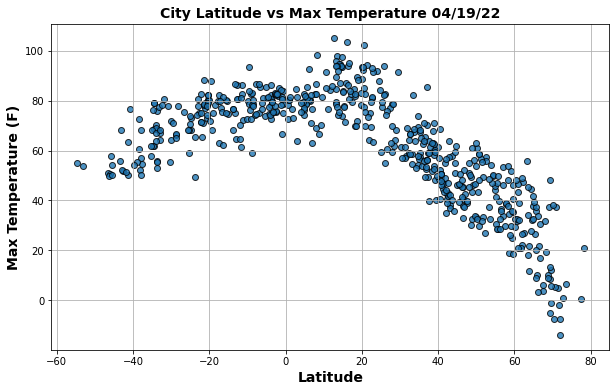

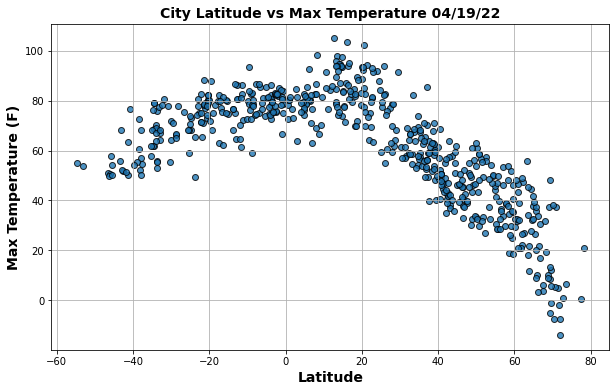

In [12]:
# Create Scatter Chart for Lat vs Max Temp
plt.subplots(figsize=(10,6))
plt.scatter(lat, max_temp, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Max Temperature " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Max Temperature (F)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig1.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

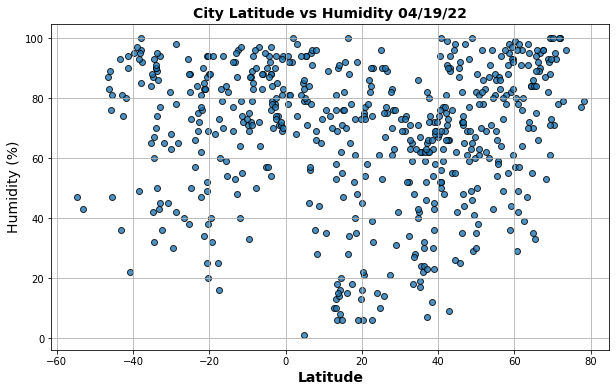

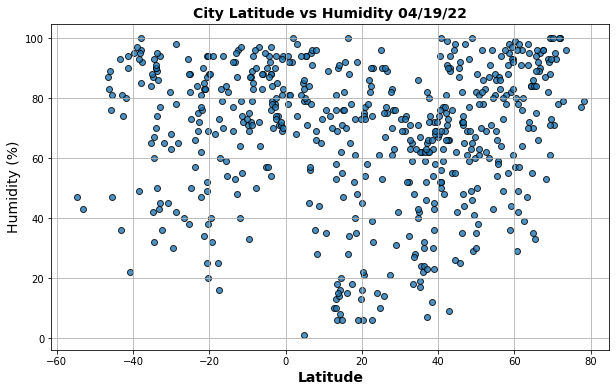

In [13]:
# Create Scatter Chart for Lat vs Humidity
plt.subplots(figsize=(10,6))
plt.scatter(lat, hum, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Humidity " + time.strftime('%x'), fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='demi', fontsize=14)
plt.ylabel("Humidity (%)", fontweight=550, fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig2.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

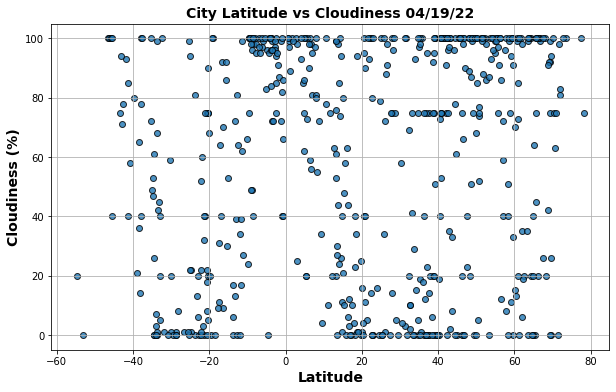

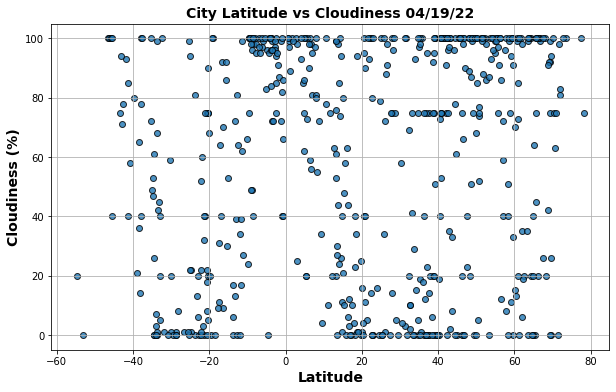

In [14]:
# Create Scatter Chart for Lat vs Cloudiness
plt.subplots(figsize=(10,6))
plt.scatter(lat, clouds, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Cloudiness " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Cloudiness (%)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig3.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<function matplotlib.pyplot.show(close=None, block=None)>

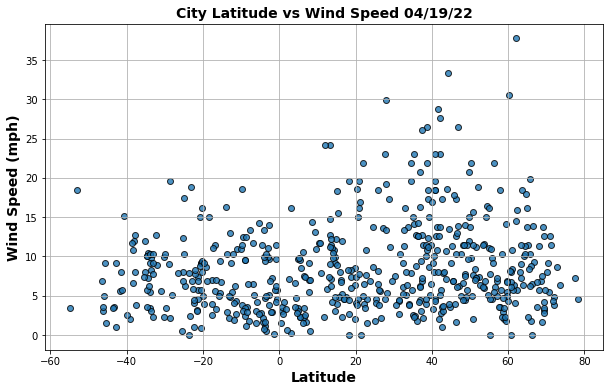

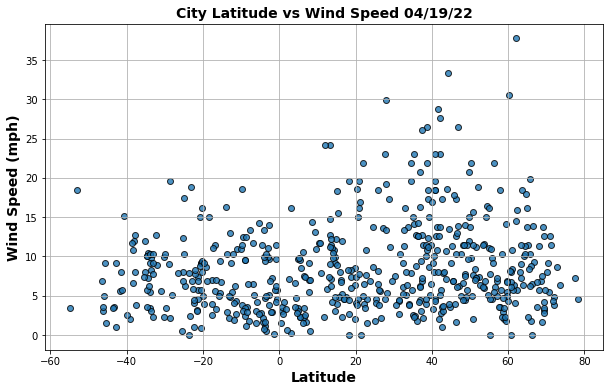

In [15]:
# Create Scatter Chart for Lat vs Wind Speed
plt.subplots(figsize=(10,6))
plt.scatter(lat, wind, label='cities', 
            edgecolor='black', linewidths=1, 
            alpha=0.8, marker='o')

# Add title and labels 
plt.title(f"City Latitude vs Wind Speed " + time.strftime('%x'),
          fontweight='semibold', fontsize=14)
plt.xlabel("Latitude", fontweight='semibold', fontsize=14)
plt.ylabel("Wind Speed (mph)",fontweight='semibold', fontsize=14)

# Add Grid
plt.grid()

# Save Fig and show 
plt.savefig('weather_data/Fig4.png')
plt.show

In [16]:
# Create a linear regression function 
def plot_linear_regression(x_values, y_values, title, y_label, text_coord):
    
    # Get linear regression data 
    (slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)
    lin_reg_lst = (slope, intercept, r_value, p_value, stderr)
    lin_reg_df = pd.DataFrame({"Slope":slope,
                               "Intercept":intercept,
                               "r Value":r_value,
                               "p Value":p_value,
                               "Std Error":stderr}, index=[0])
    
    print(lin_reg_df)
    # Calculate regress y_values using linear regression data above 
    regress_values = x_values * slope + intercept
    
    # Get equation for linear regression line 
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create Scatter plot with linear regression line 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="r")
    
    # Annotate text for linear regression equation 
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DFs
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

      Slope  Intercept   r Value        p Value  Std Error
0 -1.061893  96.584459 -0.879477  1.582297e-126   0.029249
      Slope  Intercept   r Value        p Value  Std Error
0 -1.061893  96.584459 -0.879477  1.582297e-126   0.029249


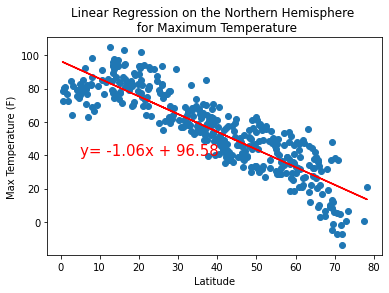

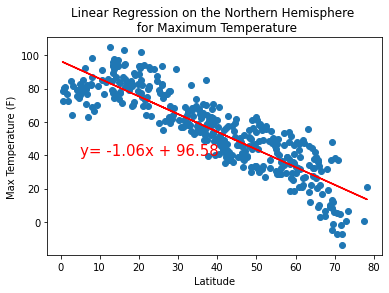

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [18]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       "Max Temperature (F)", (5,40))
plt.savefig('weather_data/Fig5.png')

      Slope  Intercept   r Value       p Value  Std Error
0  0.523635  83.257936  0.705628  4.914592e-29   0.038977
      Slope  Intercept   r Value       p Value  Std Error
0  0.523635  83.257936  0.705628  4.914592e-29   0.038977


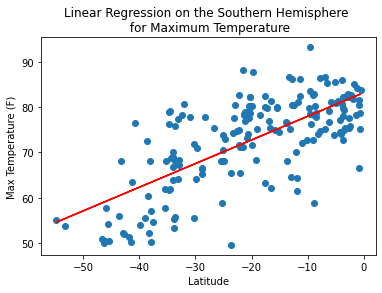

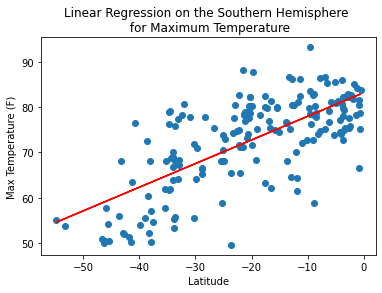

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [19]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                       "Max Temperature (F)", (-30,36))
plt.savefig('weather_data/Fig6.png')

      Slope  Intercept   r Value       p Value  Std Error
0  0.312236  53.848615  0.251761  5.053445e-07   0.061092
      Slope  Intercept   r Value       p Value  Std Error
0  0.312236  53.848615  0.251761  5.053445e-07   0.061092


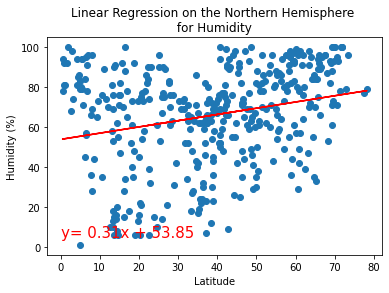

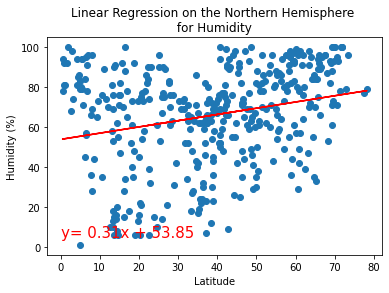

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [20]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Linear Regression on the Northern Hemisphere \n for Humidity ",
                       "Humidity (%)", (0,5))
plt.savefig('weather_data/Fig7.png')

      Slope  Intercept  r Value   p Value  Std Error
0  0.174314  76.894551  0.12037  0.103614   0.106563
      Slope  Intercept  r Value   p Value  Std Error
0  0.174314  76.894551  0.12037  0.103614   0.106563


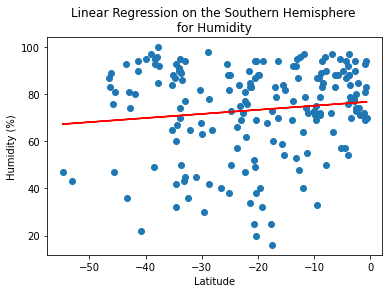

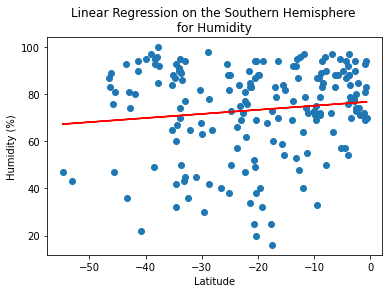

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [21]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Linear Regression on the Southern Hemisphere \n for Humidity ",
                       "Humidity (%)", (-30,5))
plt.savefig('weather_data/Fig8.png')

      Slope  Intercept   r Value   p Value  Std Error
0  0.219987  50.810822  0.109094  0.031683   0.102024
      Slope  Intercept   r Value   p Value  Std Error
0  0.219987  50.810822  0.109094  0.031683   0.102024


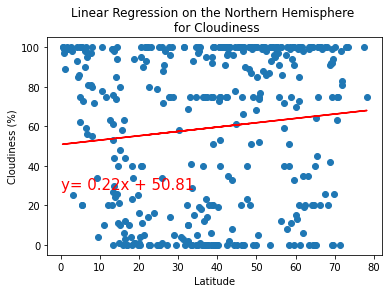

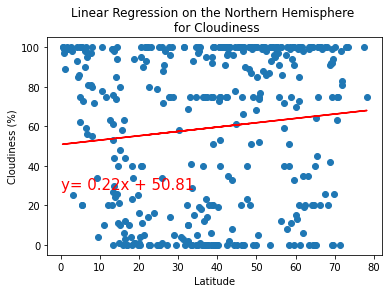

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [22]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Linear Regression on the Northern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (0,28))
plt.savefig('weather_data/Fig9.png')

      Slope  Intercept  r Value   p Value  Std Error
0  0.889973  72.466173  0.31356  0.000015   0.199778
      Slope  Intercept  r Value   p Value  Std Error
0  0.889973  72.466173  0.31356  0.000015   0.199778


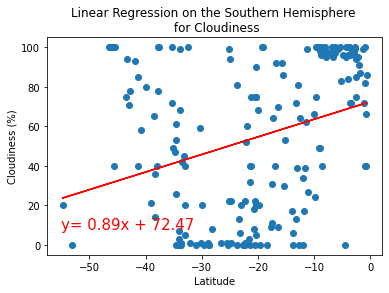

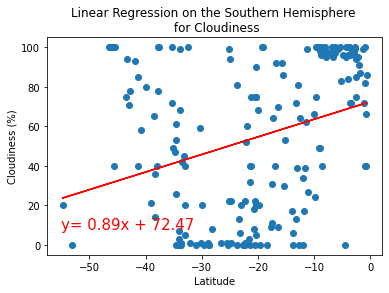

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [23]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Linear Regression on the Southern Hemisphere \n for Cloudiness",
                       "Cloudiness (%)", (-55,8))
plt.savefig('weather_data/Fig10.png')

      Slope  Intercept   r Value   p Value  Std Error
0  0.022992    8.22878  0.073965  0.145879   0.015779
      Slope  Intercept   r Value   p Value  Std Error
0  0.022992    8.22878  0.073965  0.145879   0.015779


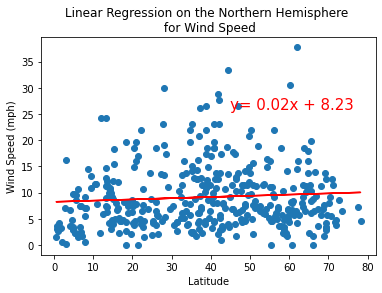

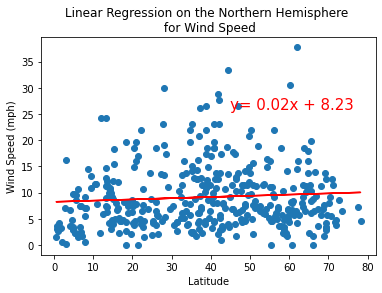

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [24]:
# Create Northern Hemisphere Chart
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed",
                       "Wind Speed (mph)", (45,26))
plt.savefig('weather_data/Fig11.png')

      Slope  Intercept   r Value   p Value  Std Error
0 -0.025816   6.547319 -0.083162  0.261728   0.022931
      Slope  Intercept   r Value   p Value  Std Error
0 -0.025816   6.547319 -0.083162  0.261728   0.022931


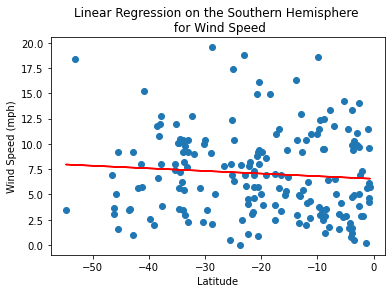

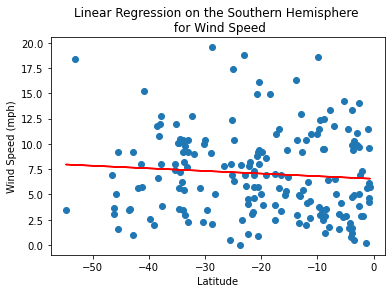

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [25]:
# Create Southern Hemisphere Chart
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed",
                       "Wind Speed (mph)", (-25,28))
plt.savefig('weather_data/Fig12.png')